### 📚 Chapter4 신경망 학습
#### 4.1 데이터에서 학습한다!
##### 4.1.1 데이터 주도 학습
🔹 5 ---> 사람이 생각한 알고리즘 -------------> 결과<br>
🔹 5 ---> 사람이 생각한 특징 ---> 기계학습 ---> 결과<br>
🔹 5 ---> 신경망 (딥러닝) -------------------> 결과

🌟 딥러닝 = 종단간 기계학습 : 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻
##### 4.1.2 훈련 데이터와 시험 데이터
🔹 `범용 능력`을 제대로 평가하기 위해 훈련 데이터와 `시험 데이터`로 분리<br>
🔹 `Overfitting` : 한 데이터셋에만 지나치게 최적화된 상태
#### 4.2 손실함수
🔹 손실함수 : '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색할 때 지표로 사용, `오차제곱합`과 `엔트로피 오차`
##### 4.2.1 오차제곱합
🔹 $ E $ = $\frac{1}{2}\displaystyle\sum_{k} (y_k - t_k)^2$ <br>
🔹 $y_k$ : 신경망이 추정한 값, $t_k$ : 정답 레이블, k : 데이터의 차원 수

In [3]:
# "손글씨 숫자 인식" 예에서 y_k와 t_k는 다음과 같음
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    # 소프트맥스 함수의 출력
k = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

📌 이미지가 '0'일 확률은 0.1, '1'일 확률은 0.05, '2'일 확룰은 0.6이라고 해석<br>
📌 t는 정답을 가르키는 위치의 원소는 1로, 그 외에는 0으로 표기 --> 정답 = '2' <br>

🌟 `원-핫 인코딩` : 한 원소만 1로 하고 그 외에는 0으로 나타내는 표기법

In [4]:
# 오차제곱합 파이썬 구현
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y - k) ** 2)

In [5]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1) '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
# 예2) '7'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

📌 오차제곱합 기준으로 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단

##### 4.2.2 교차 엔트로피 오차
🔹 $ E $ = $-\displaystyle\sum_{k} t_k logy_k$ <br>
🔹 $y_k$ : 신경망이 추정한 값, $t_k$ : 정답 레이블 (원-핫 인코딩), k : 데이터의 차원 수

In [7]:
# 자연로그의 그래프
x = np.arange(0, 1, 0.01)

C:\Users\user\AppData\Local\Temp\ipykernel_14616\2190314817.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x))


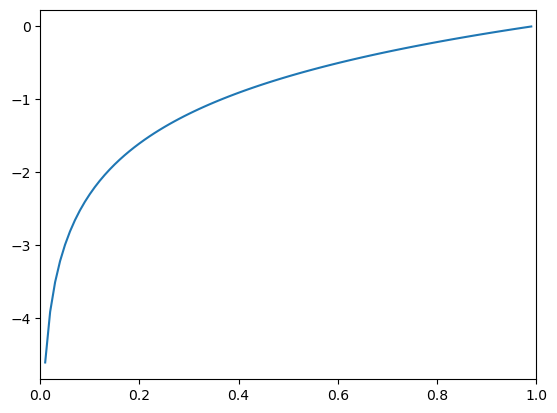

In [8]:
import matplotlib.pyplot as plt

plt.plot(x, np.log(x))
plt.xlim(0, 1)
plt.show()

In [9]:
# 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# np.log()함수에 0을 입력하면 마이너스 무한대가 되기 때문에 아주 작은 값인 delta를 더해줌

In [10]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

📌 오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단

##### 4.2.3 미니배치 학습
🔹 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법 - 교차 엔트로피 오차<br>
🔹 $ E $ = $-\frac{1}{N} \displaystyle\sum_{n} \displaystyle\sum_{k} t_{nk} logy_{nk}$
- $y_{nk}$ : 신경망의 출력, $t_{nk}$ : 정답 레이블, n번째 데이터의 k번째 값
- 마지막에 N으로 나누어 정규화 (평균 손실 함수)

🔹 미니배치 학습: 훈련 데이터로부터 일부만 골라 학습 수행

In [12]:
# MNIST 데이터셋 불러오기
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

In [13]:
(x_train, t_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [14]:
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [15]:
# 무작위로 10장만 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

##### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [16]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [17]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


#### 4.3 수치 미분
##### 4.3.1 미분

In [18]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

❗위의 방식은 `반올림 오차` 문제를 일으킴

In [19]:
np.float32(1e-50)

0.0

In [25]:
# 미세한 h값으로 1e-4 사용
# 수치 미분에는 오차가 포함되기 때문에 (x+h)와 (x-h)일때의 함수 f의 차분을 계산
# ==> 중심 차분, 중앙 차분
def numerical_diff(f, x):
    h = 1e-04   # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

##### 4.3.2 수치 미분의 예

In [26]:
# y = 0.01*x^2 + 0.1*x
def function_1(x):
    return 0.01*x**2 + 0.1*x

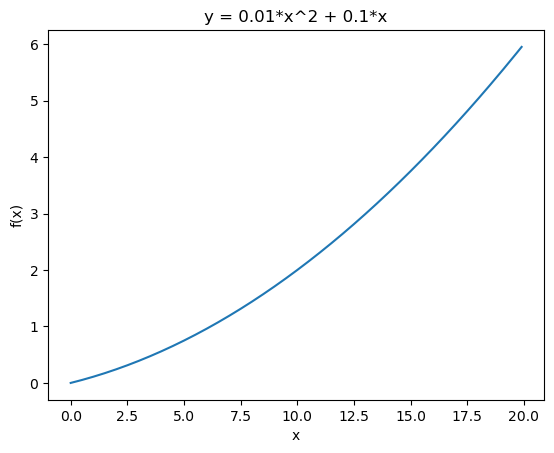

In [27]:
# 시각화
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.title("y = 0.01*x^2 + 0.1*x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [28]:
# x = 5일 때 미분
numerical_diff(function_1, 5)

0.1999999999990898

In [29]:
# x = 10일 때 미분
numerical_diff(function_1, 10)

0.2999999999986347

📌 미분 값 = x에 대한 f(x)의 변화량 (함수의 기울기)

##### 4.3.3 편미분

In [30]:
# 인수들의 제곱 합을 계산
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [31]:
# 문제1 : x0 = 3, x1 = 4일 때, x0에 대한 편미분 구하기
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [32]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [33]:
# 문제2 : x0 = 3, x1 = 4일 때, x1에 대한 편미분 구하기
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

In [34]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

##### 4.4 기울기

In [38]:
# x0와 x1의 편미분을 동시에 계산
def numerical_gradient(f, x):
    h = 1e-04
    grad = np.zeros_like(x)     # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # (f + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # (f - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val    # 값 복원
        
    return grad

In [40]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [41]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [46]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

4.4.1 경사법 (경사하강법)

🔹현 위치에서 기울어진 방향으로 일정 거리만큼 이동 --> 함수의 값을 점차 줄이는 것<br>
🔹학습률 : 매개변수 값을 얼마나 갱신하느냐를 정하는 것

In [49]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [50]:
# 문제 : 경사하강법으로 f(x0, x1) = x0^2 + x1^2의 최솟값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

In [51]:
# 초기값 설정
init_x = np.array([-3.0, 4.0])

In [52]:
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

📌 거의 0에 가까운 결과

In [53]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [54]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

📌 학습률이 너무 크면 큰 값으로 발산, 너무 작으면 거의 갱신 X

##### 4.4.2 신경망에서의 기울기

In [1]:
# simpleNet 클래스
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [5]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 표준정규분포로 초기화 (2 X 3 행렬)

    def predict(self, x):
        return np.dot(x, self.W)    # np.dot() : 행렬곱

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [6]:
net = simpleNet()
print(net.W)

[[ 1.15822104  0.96678824  0.39499267]
 [-0.02815219 -1.10394049 -1.53641149]]


In [7]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.66959565 -0.41347349 -1.14577474]


In [8]:
# 최댓값의 인덱스
np.argmax(p)

0

In [9]:
# 정답 레이블
t = np.array([0, 0, 1])

In [10]:
net.loss(x, t)

2.221722490393348

In [11]:
# 기울기 구하기
def f(W):
    return net.loss(x, t)

In [13]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.39964462  0.13530163 -0.53494625]
 [ 0.59946694  0.20295244 -0.80241938]]


📌 w11을 h만큼 늘리면 손실 함수의 값은 0.3996*h 만큼 증가 ==> 음의 방향으로 갱신

In [14]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)